<a href="https://colab.research.google.com/github/Requenamar3/Data-Mining/blob/main/DataMining_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/fenago/datasets/main/protein.csv"
food_data = pd.read_csv(url)

In [ ]:
food_data.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [ ]:
correlation_matrix = food_data.iloc[:,1:].corr()
correlation_matrix

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
RedMeat,1.000000,0.153003,0.585609,0.502931,0.060957,-0.499877,0.135426,-0.349449,-0.074221
WhiteMeat,0.153003,1.000000,0.620409,0.281484,-0.234009,-0.413797,0.313772,-0.634962,-0.061317
Eggs,0.585609,0.620409,1.000000,0.575533,0.065571,-0.712437,0.452231,-0.559781,-0.045518
Milk,0.502931,0.281484,0.575533,1.000000,0.137884,-0.592737,0.222411,-0.621087,-0.408364
Fish,0.060957,-0.234009,0.065571,0.137884,1.000000,-0.524231,0.403853,-0.147153,0.266139
Cereals,-0.499877,-0.413797,-0.712437,-0.592737,-0.524231,1.000000,-0.533262,0.650997,0.046548
Starch,0.135426,0.313772,0.452231,0.222411,0.403853,-0.533262,1.000000,-0.474312,0.084410
Nuts,-0.349449,-0.634962,-0.559781,-0.621087,-0.147153,0.650997,-0.474312,1.000000,0.374970
Fr&Veg,-0.074221,-0.061317,-0.045518,-0.408364,0.266139,0.046548,0.084410,0.374970,1.000000


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(food_data.iloc[:, 1:])

pca = PCA()
pcafood = pca.fit(scaled_data)

print(pcafood)

PCA()


In [ ]:
foodpc = pca.transform(scaled_data)
print(foodpc)

[[ 3.55723814e+00 -1.66410153e+00  1.79755117e+00  2.34393720e-01
   2.37334793e-02 -1.05559205e+00 -4.81469628e-01 -7.77255003e-01
   1.05382405e-01]
 [-1.45200587e+00 -1.06270224e+00 -1.36539039e+00  1.71563620e-01
  -9.52694928e-01  2.22932247e-01 -1.84889698e-01  2.56178342e-01
   2.21930212e-01]
 [-1.65547983e+00  1.62784489e-01 -2.20999548e-01  5.31463788e-01
   7.70660901e-01 -2.95781090e-01 -1.99630084e-01  2.07504199e-01
   3.38554796e-02]
 [ 3.19870836e+00 -1.32789455e+00 -1.54409266e-01  2.18606147e-01
  -4.94741169e-01 -7.09921249e-01  4.74366591e-01  8.24911254e-01
   3.06046263e-01]
 [-3.78103882e-01 -6.15095879e-01 -1.22060302e+00 -4.73549701e-01
   2.62119692e-01 -8.40063194e-01  3.21442872e-01 -1.25516833e-02
   1.52529985e-01]
 [-2.41404237e+00  2.91331924e-01  7.67775590e-01 -9.87288484e-01
  -7.67948816e-01 -1.73841966e-01 -2.30472383e-01  6.33826687e-01
  -4.90183123e-01]
 [-1.45153787e+00  4.59586384e-01 -1.32939949e+00 -1.15938569e+00
   4.31664177e-01 -6.6168114

In [ ]:
# Converting the principal components data into a DataFrame
pc_columns = [f'PC{i+1}' for i in range(pcafood.n_components_)]
foodpc_df = pd.DataFrame(foodpc, columns=pc_columns, index=food_data['Country'])

# Display the DataFrame
print(foodpc_df)

                     PC1       PC2       PC3       PC4       PC5       PC6  \
Country                                                                      
Albania         3.557238 -1.664102  1.797551  0.234394  0.023733 -1.055592   
Austria        -1.452006 -1.062702 -1.365390  0.171564 -0.952695  0.222932   
Belgium        -1.655480  0.162784 -0.221000  0.531464  0.770661 -0.295781   
Bulgaria        3.198708 -1.327895 -0.154409  0.218606 -0.494741 -0.709921   
Czechoslovakia -0.378104 -0.615096 -1.220603 -0.473550  0.262120 -0.840063   
Denmark        -2.414042  0.291332  0.767776 -0.987288 -0.767949 -0.173842   
E Germany      -1.451538  0.459586 -1.329399 -1.159386  0.431664 -0.661681   
Finland        -1.596104 -0.608293  2.091770 -1.444493  0.037970  0.851402   
France         -1.518666  0.801560 -0.001921  1.997822  0.255623 -0.917485   
Greece          2.285884  1.021701  0.900803  1.831320 -0.413328  1.168077   
Hungary         1.487493 -0.832777 -1.953639 -0.221871 -0.042251

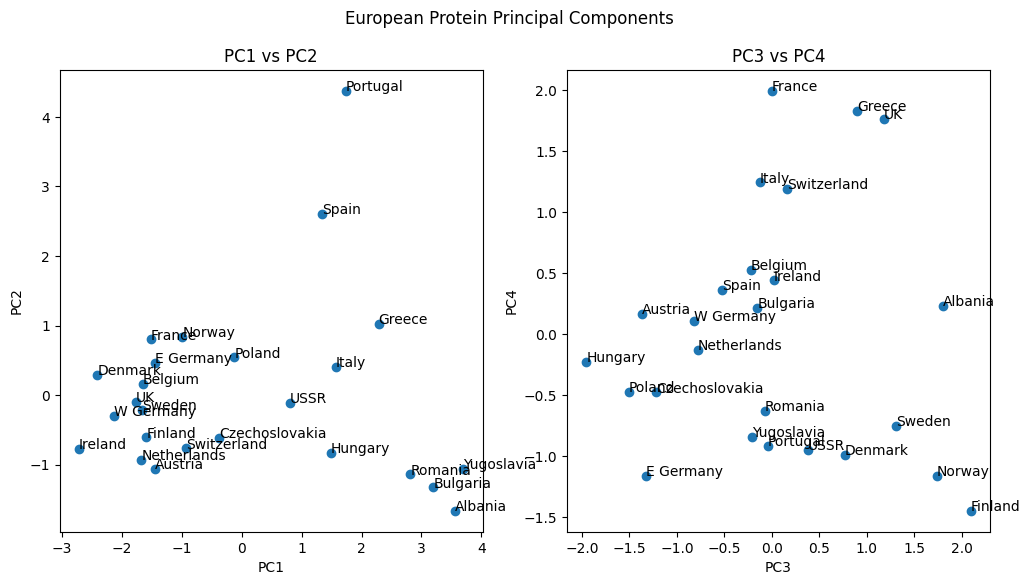

In [ ]:
import matplotlib.pyplot as plt

# Plot of PC1 vs PC2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(foodpc[:, 0], foodpc[:, 1])
for i, txt in enumerate(food_data['Country']):
    plt.annotate(txt, (foodpc[i, 0], foodpc[i, 1]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')

# Plot of PC3 vs PC4
plt.subplot(1, 2, 2)
plt.scatter(foodpc[:, 2], foodpc[:, 3])
for i, txt in enumerate(food_data['Country']):
    plt.annotate(txt, (foodpc[i, 2], foodpc[i, 3]))
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('PC3 vs PC4')

plt.suptitle('European Protein Principal Components')
plt.show()

In [ ]:
pca.components_[1]

array([-0.05625165, -0.23685334, -0.03533576, -0.18458877,  0.6468197 ,
       -0.23348508,  0.35282564,  0.14331056,  0.53619004])

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Step 1 - load the data
url = "https://raw.githubusercontent.com/fenago/datasets/main/protein.csv"
food_data = pd.read_csv(url)
food_data.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [ ]:
# Step 2:  Scale the data
scaler = StandardScaler()
food_scaled = scaler.fit_transform(food_data.iloc[:, 1:])
food_scaled

In [ ]:
# Step 3:  Perform a PCA on the fields (define the variance and the "principal components")
pca = PCA()
principal_components = pca.fit_transform(food_scaled)

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(food_data.columns))], index=food_data.columns[1:])
loadings.head(25)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
RedMeat,-0.302609,-0.056252,0.297580,0.646477,0.322160,-0.459870,0.150334,0.019858,-0.246000
WhiteMeat,-0.310556,-0.236853,-0.623897,-0.036992,-0.300165,-0.121007,-0.019664,0.027876,-0.592397
Eggs,-0.426679,-0.035336,-0.181528,0.313164,0.079110,0.361249,-0.443272,0.491200,0.333386
Milk,-0.377727,-0.184589,0.385658,-0.003318,-0.200414,0.618438,0.462095,-0.081422,-0.178084
Fish,-0.135650,0.646820,0.321274,-0.215955,-0.290031,-0.136791,-0.106394,0.448732,-0.312826
Cereals,0.437743,-0.233485,-0.095918,-0.006204,0.238168,0.080758,0.404964,0.702995,-0.152260
Starch,-0.297248,0.352826,-0.242975,-0.336685,0.735973,0.147667,0.152753,-0.114540,-0.121858
Nuts,0.420334,0.143311,0.054388,0.330288,0.150537,0.447010,-0.407262,-0.183800,-0.518275
Fr&Veg,0.110420,0.536190,-0.407556,0.462056,-0.233517,0.118550,0.449978,-0.091963,0.202950


In [ ]:
# Assuming loadings is a pandas DataFrame with PCA loadings as given above
import pandas as pd

# Set a threshold for which features to extract
threshold = 0.3

# Find features with loadings above the threshold for each principal component
important_features = {}
for column in loadings.columns:
    important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# Now 'important_features' dictionary contains the important features for each PC
for pc, features in important_features.items():
    print(f"{pc}: {', '.join(features)}")

PC1:  RedMeat,  WhiteMeat,  Eggs,  Milk,  Cereals,  Nuts
PC2:  Fish,  Starch,  Fr&Veg
PC3:  WhiteMeat,  Milk,  Fish,  Fr&Veg
PC4:  RedMeat,  Eggs,  Starch,  Nuts,  Fr&Veg
PC5:  RedMeat,  WhiteMeat,  Starch
PC6:  RedMeat,  Eggs,  Milk,  Nuts
PC7:  Eggs,  Milk,  Cereals,  Nuts,  Fr&Veg
PC8:  Eggs,  Fish,  Cereals
PC9:  WhiteMeat,  Eggs,  Fish,  Nuts


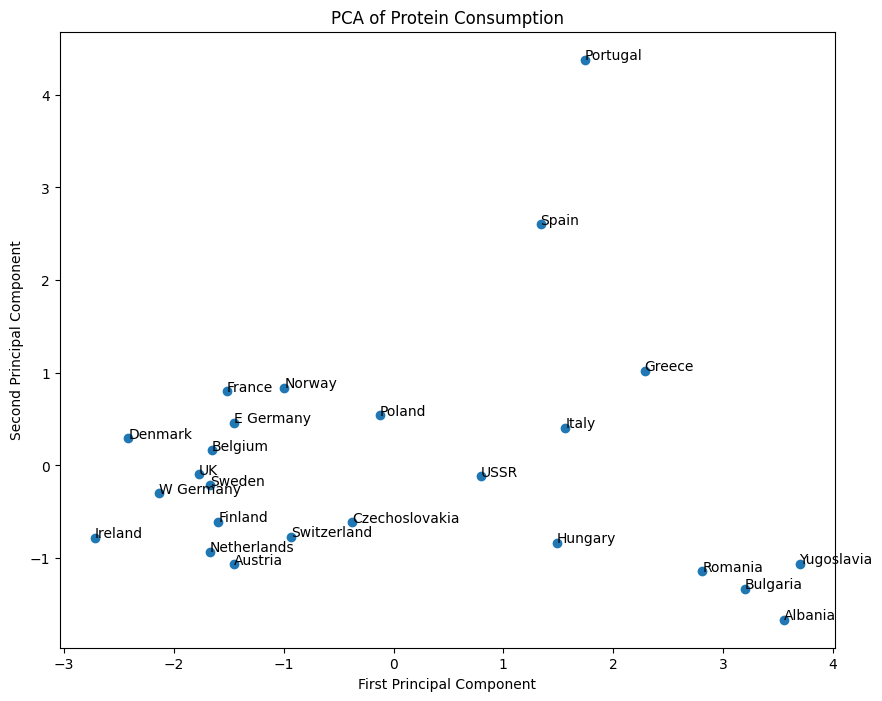

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
for i, txt in enumerate(food_data.Country):
    plt.annotate(txt, (principal_components[i, 0], principal_components[i, 1]))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Protein Consumption')
plt.show()

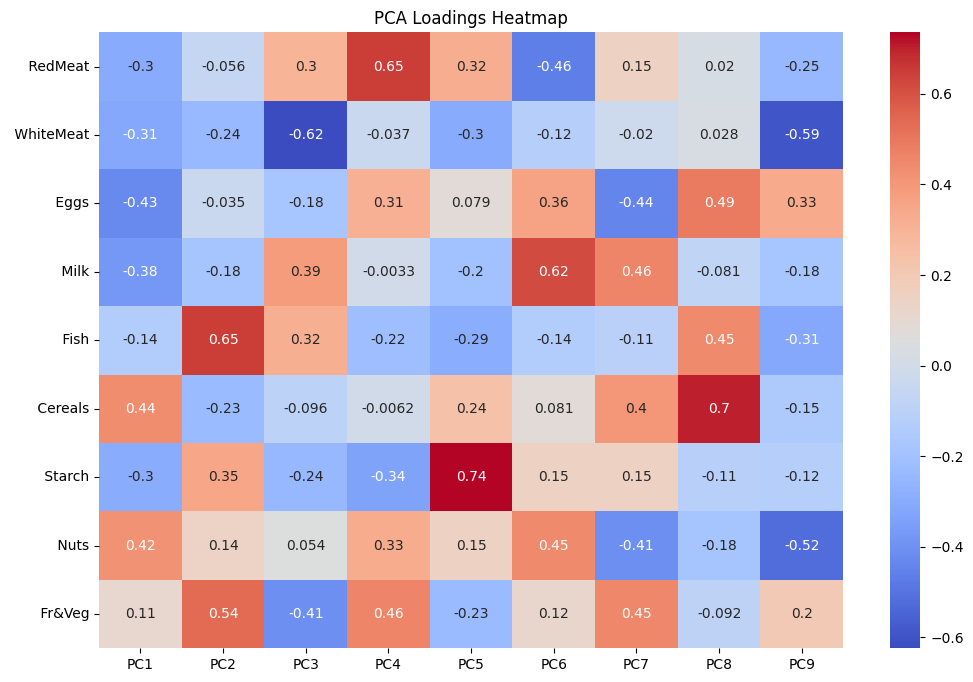

In [ ]:
import seaborn as sns

# Create a heatmap for the loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.show()


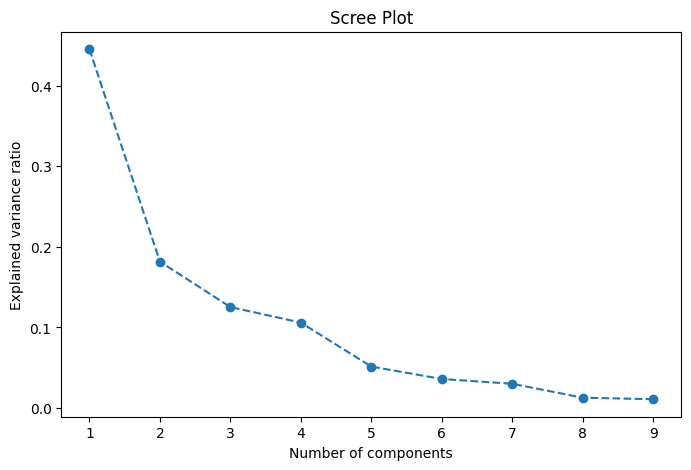

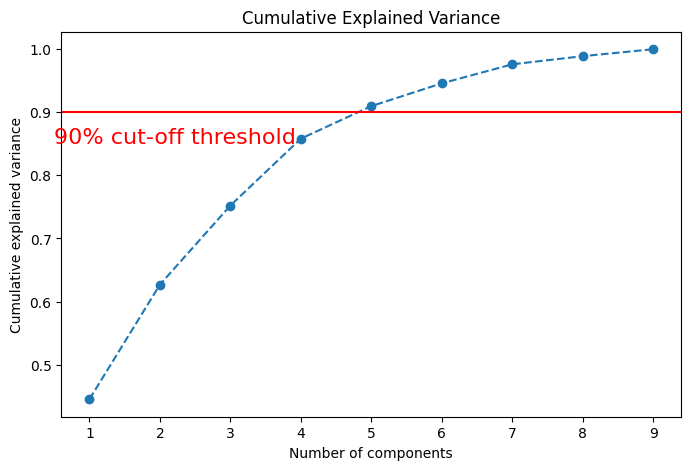

In [ ]:
import numpy as np
# Create a scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot for cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='-')  # 90% variance line
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
plt.show()

In [ ]:
# Assuming pca is already fitted PCA object from sklearn
eigenvalues = pca.explained_variance_

# Applying Kaiser Criterion
kaiser_criterion = eigenvalues > 1

# Get the number of components that satisfy the Kaiser Criterion
n_components_kaiser = sum(kaiser_criterion)

# Print the components that satisfy the criterion
print(f"Number of components with eigenvalue > 1: {n_components_kaiser}")
important_components = np.arange(1, n_components_kaiser + 1)
print(f"Important components according to Kaiser Criterion: {important_components}")

# Optionally, if you want to see which specific components satisfy the criterion
for i, (ev, satisfy) in enumerate(zip(eigenvalues, kaiser_criterion), start=1):
    if satisfy:
        print(f"Component {i} with eigenvalue: {ev}")

Number of components with eigenvalue > 1: 3
Important components according to Kaiser Criterion: [1 2 3]
Component 1 with eigenvalue: 4.173372472563691
Component 2 with eigenvalue: 1.7031244242017378
Component 3 with eigenvalue: 1.1749161502198013


- PC1:  RedMeat,  WhiteMeat,  Eggs,  Milk,  Cereals,  Nuts
- PC2:  Fish,  Starch,  Fr&Veg
- PC3:  WhiteMeat,  Milk,  Fish,  Fr&Veg
- PC4:  RedMeat,  Eggs,  Starch,  Nuts,  Fr&Veg
- PC5:  RedMeat,  WhiteMeat,  Starch
- PC6:  RedMeat,  Eggs,  Milk,  Nuts
- PC7:  Eggs,  Milk,  Cereals,  Nuts,  Fr&Veg
- PC8:  Eggs,  Fish,  Cereals
- PC9:  WhiteMeat,  Eggs,  Fish,  Nuts

# Analysis
- Remember the index is by country and the data is related to diet
- PC1: "Protein Staple"
- PC2: "Pescatarian" - Mediterranean
- PC3: "Dairy & Poultry/Fish"
- PC4: "Mixed" - Balanced


In [ ]:
import pandas as pd

# Convert the principal components to a DataFrame
principal_components_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, len(food_data.columns))])

# Concatenate with the 'Country' column from the original data
final_df = pd.concat([food_data['Country'], principal_components_df], axis=1)

# Display the head of the new DataFrame
final_df.head()


,Country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,Albania,3.557238,-1.664102,1.797551,0.234394,0.023733,-1.055592,-0.481470,-0.777255,0.105382
1,Austria,-1.452006,-1.062702,-1.365390,0.171564,-0.952695,0.222932,-0.184890,0.256178,0.221930
2,Belgium,-1.655480,0.162784,-0.221000,0.531464,0.770661,-0.295781,-0.199630,0.207504,0.033855
3,Bulgaria,3.198708,-1.327895,-0.154409,0.218606,-0.494741,-0.709921,0.474367,0.824911,0.306046
4,Czechoslovakia,-0.378104,-0.615096,-1.220603,-0.473550,0.262120,-0.840063,0.321443,-0.012552,0.152530


In [ ]:
import numpy as np

# Now find the highest PC for each country using NumPy
highest_pc_for_each_country = {}

for index, row in final_df.iterrows():
    # Convert the row to a NumPy array, exclude the 'Country' column
    pc_values = row[principal_components_cols].to_numpy()

    # Use NumPy to find the index of the maximum absolute value
    highest_pc_index = np.argmax(np.abs(pc_values))

    # Get the corresponding column name
    highest_pc = principal_components_cols[highest_pc_index]

    # Store the result
    highest_pc_for_each_country[row['Country']] = highest_pc

# Display the results
for country, pc in highest_pc_for_each_country.items():
    print(f"{country}: {pc}")


Albania: PC1
Austria: PC1
Belgium: PC1
Bulgaria: PC1
Czechoslovakia: PC3
Denmark: PC1
E Germany: PC1
Finland: PC3
France: PC4
Greece: PC1
Hungary: PC3
Ireland: PC1
Italy: PC1
Netherlands: PC1
Norway: PC3
Poland: PC3
Portugal: PC2
Romania: PC1
Spain: PC2
Sweden: PC1
Switzerland: PC4
UK: PC1
USSR: PC5
W Germany: PC1
Yugoslavia: PC1


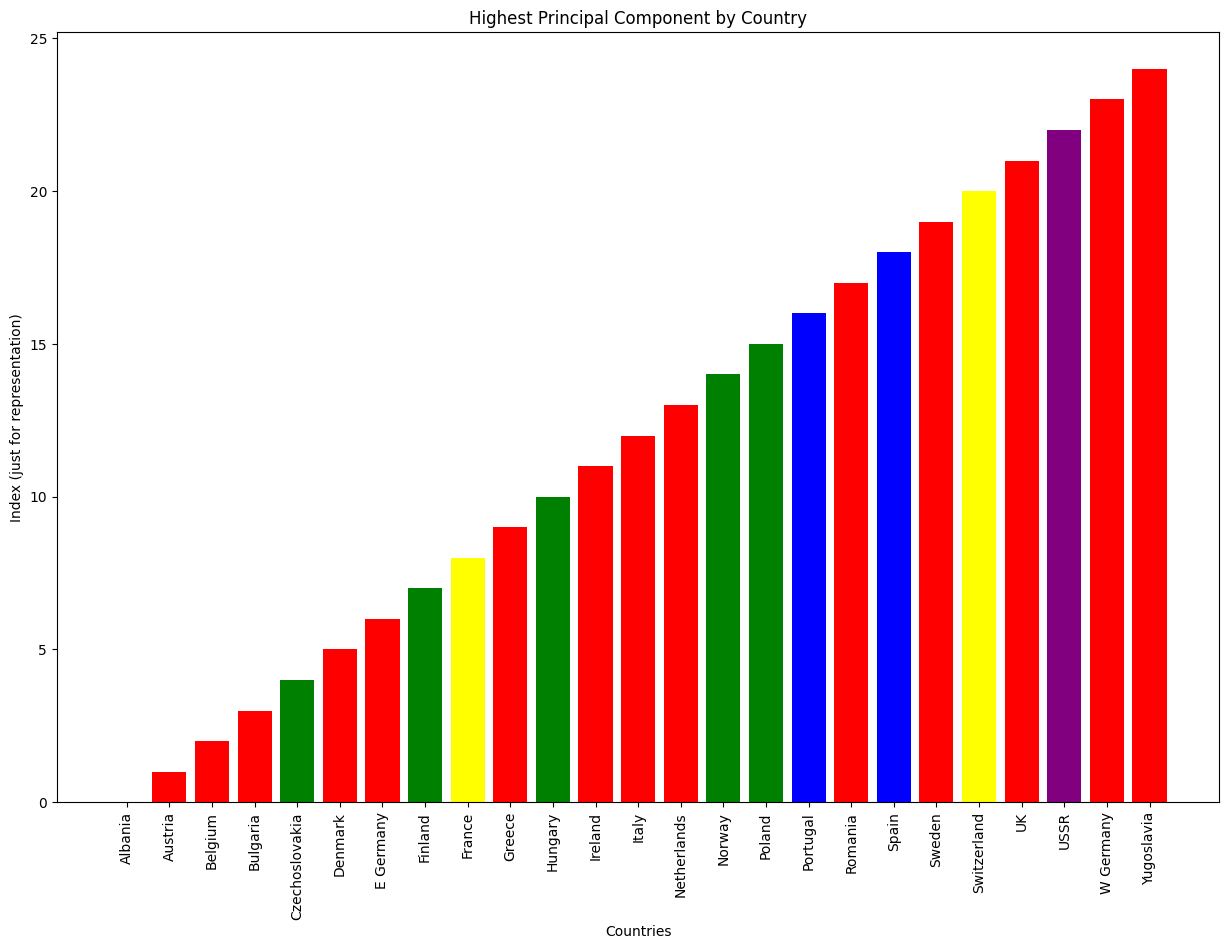

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'highest_pc_for_each_country' is your dictionary from earlier

# Prepare data for plotting
countries = list(highest_pc_for_each_country.keys())
highest_pcs = list(highest_pc_for_each_country.values())

# Assign colors to each principal component
color_map = {'PC1': 'red', 'PC2': 'blue', 'PC3': 'green', 'PC4': 'yellow', 'PC5': 'purple'}
colors = [color_map[pc] for pc in highest_pcs]

# Create a bar chart
plt.figure(figsize=(15, 10))
plt.bar(countries, range(len(countries)), color=colors)
plt.xlabel('Countries')
plt.ylabel('Index (just for representation)')
plt.xticks(rotation=90)  # Rotate country names for readability
plt.title('Highest Principal Component by Country')
plt.show()

